<a href="https://colab.research.google.com/github/madol-abraham/Complete-date-science-and-machine-learning/blob/main/Simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
# read the dataset
df = pd.read_csv('height-weight.csv')

In [72]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


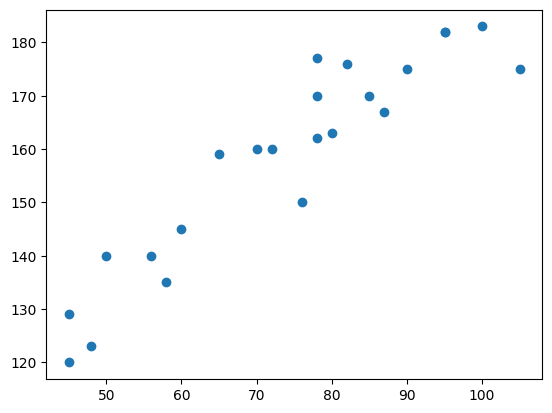

In [73]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])

In [74]:
# correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


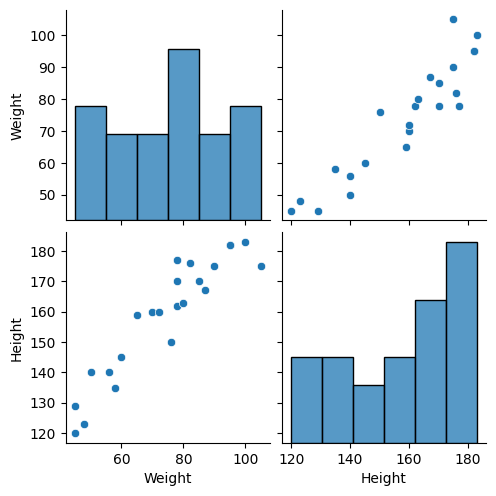

In [75]:
# seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [76]:
# independent and dependent features
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [77]:
X =df[['Weight']] # independent feature should be in dataframe or 2 dimensional array
y =df['Height'] # dependent feature

In [78]:
X_series= df['Weight']
np.array(X_series).shape

(23,)

In [79]:
np.array(y).shape

(23,)

In [80]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [81]:
y_train

,Height
12,175
1,135
13,183
5,162
2,123
11,182
20,129
3,145
4,160
18,150


In [82]:
y_test

,Height
15,177
9,170
0,120
8,182
17,159


In [83]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train,y_train)
X_test=scaler.transform(X_test)

In [84]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
regression = LinearRegression(n_jobs=1)

In [87]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=1)

In [88]:
print("coefficient or slope",regression.coef_)
print("intercept",regression.intercept_)

coefficient or slope [17.03440872]
intercept 157.5


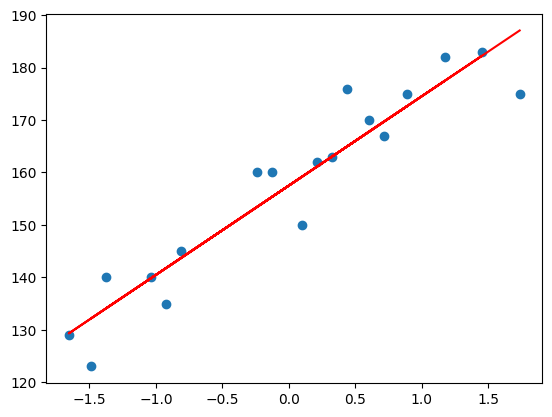

In [89]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color='red')

prediction of test data

predicted height output= intercept +coef_(Weights)

y_pred_test = 157.5 + 17.03440872(X_test)

In [90]:
# prediction for the test data
y_pred = regression.predict(X_test)

In [91]:
# performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [92]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


R square

Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [93]:
from sklearn.metrics import r2_score

In [94]:
score = r2_score(y_test,y_pred)
print(score)

0.776986986042344


In [95]:
# Ols linear regression
import statsmodels.api as sm

In [96]:
model = sm.OLS(y_train,X_train).fit()

In [97]:
prediction = model.predict(X_test)
print(prediction)

[  3.58467086   3.58467086 -28.1958439   19.95645118  -8.93492586]


In [98]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Tue, 11 Feb 2025   Prob (F-statistic):                       0.661
Time:                        08:46:48   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [99]:
## prediction for new data
regression.predict(scaler.transform([[67]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([150.49116594])